### Selecting the miost appropriate Time Series Model.

* We start with the most simple models and gradually move to more complex models.

* As we try more complex models with more number of predictors, the coeefficients on the new predictors in the complex model should be significantly different from zero. Only then we benefit from moving to the more complex model. If the coefficients for the new predictors are close to zero, it implies that these predictors do not have good predictive power, and we should probably move back to the simpler model.

* We prefer simpler models, unless the more complex model makes significantly better predictions. To test if the predictions are significantly better we have the Log-Likelihood Ratio(LLR) test (used for models with different degrees of freedom).

* For comparing models with the same number of required lags we can't use LLR, so we compare the information criteria for each one. Lower the coefficients, less is the data required to make accurate predictions. Lower AIC,BIC preferable. 

* If our model fits well, there should be no trend that we have failed to account for and hence our residuals should resemble white noise. This ensure that there is no other trend left unaccounted for and we cant make our model better without overfitting it.

### Auto Regressive(AR) Model

A linear model where current period values are a sum of past outcomes multiplied by a numeric factor.

An AR(1) model only uses the value of the immediately preceding period as the predictor.

$x_{t} = C + \phi x_{t-1} + \epsilon_{t},  |\phi| <= 1$

If $|\phi| > 1$, then at some point the series will blow up.

Question arises - How many lagged predictors should we use? We start with a simple model and gradually increase the number of predictors and see what happens to the coefficients. If the coefficients are not significantly different from zero, then the ew predictors are not useful. We also check if the more complicated model is doing a better job at predicting?

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

In [19]:
raw_csv_data = pd.read_csv("data/Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, format = "%d/%m/%Y")
df_comp.set_index("date",inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value'] = df_comp.ftse
del df_comp['spx'],df_comp['dax'],df_comp['ftse'],df_comp['nikkei']
size = int(len(df_comp) * 0.8)
df,df_test = df_comp.iloc[:size],df_comp.iloc[size:]

### ACF

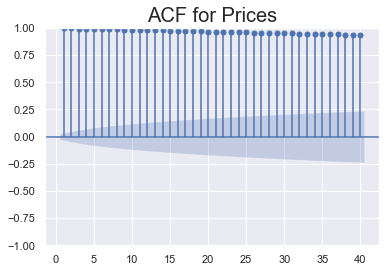

In [20]:
sgt.plot_acf(df.market_value,zero = False,lags = 40)
plt.title('ACF for Prices',size=20)
plt.show()

### PACF

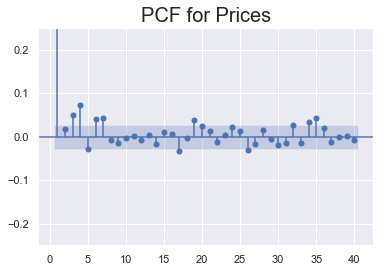

In [21]:
sgt.plot_pacf(df.market_value,zero = False,lags = 40,alpha = 0.05,method = ('ols'))
plt.title('PCF for Prices',size=20)
plt.ylim(-0.25,0.25)
plt.show()

We observe that the values for the later lags are quite insignificant, so we can ignore them.

### The AR(1) model

In [30]:
model_ar = ARIMA(df.market_value,order = (1,0,0))
results_ar = model_ar.fit()
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -27622.604
Date:                Sat, 20 Nov 2021   AIC                          55251.207
Time:                        16:37:29   BIC                          55270.772
Sample:                    01-07-1994   HQIC                         55258.063
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6374    423.329     12.023      0.000    4259.929    5919.346
ar.L1          0.9984      0.001   1147.578      0.000       0.997       1.000
sigma2      3511.3842     40.874     85.907      0.000    3431.272    3591.496
===================================================================================
Ljung-Box (L1) (Q):                   1.51   Jarque-Bera (JB):              3313.33
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### Interpreting Results 

* Coef is the coefficients that the model estimates. First is C and the second is $\phi1$.
* Both the estimates have high t-stats and low p values, indicating that the numvers are significantly different from 0.
* It also provides the estiamted distribution of C and $\phi1$. Note that both the distributions do not include 0 - another indication that the estimates are siginificantly non-zero.

### Higher Lag AR Models

In [46]:
model_ar_2 = ARIMA(df.market_value,order = (2,0,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -27621.949
Date:                Sat, 20 Nov 2021   AIC                          55251.898
Time:                        17:30:27   BIC                          55277.984
Sample:                    01-07-1994   HQIC                         55261.039
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    368.251     13.821      0.000    4367.881    5811.400
ar.L1          0.9811      0.010     99.868      0.000       0.962       1.000
ar.L2          0.0171      0.010      1.749      0.080      -0.002       0.036
sigma2      3510.1277     41.037     85.535      0.000    3429.696    3590.560
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3282.81
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In the AR(2) model above, note that the p value is higher for the L2 value, indicating that the value is not significantly different from 0.
The distribution also contains 0.

In [41]:
model_ar_3 = ARIMA(df.market_value,order = (3,0,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -27615.962
Date:                Sat, 20 Nov 2021   AIC                          55241.925
Time:                        16:45:52   BIC                          55274.532
Sample:                    01-07-1994   HQIC                         55253.351
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    378.583     13.444      0.000    4347.631    5831.651
ar.L1          0.9802      0.010     99.076      0.000       0.961       1.000
ar.L2         -0.0309      0.013     -2.315      0.021      -0.057      -0.005
ar.L3          0.0489      0.009      5.383      0.000       0.031       0.067
sigma2      3502.2643     41.020     85.379      0.000    3421.866    3582.662
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              3286.97
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
model_ar_4 = ARIMA(df.market_value,order = (4,0,0))
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27602.680
Date:                Sat, 20 Nov 2021   AIC                          55217.359
Time:                        16:48:20   BIC                          55256.488
Sample:                    01-07-1994   HQIC                         55231.070
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    391.959     12.985      0.000    4321.415    5857.867
ar.L1          0.9767      0.010     97.788      0.000       0.957       0.996
ar.L2         -0.0287      0.013     -2.129      0.033      -0.055      -0.002
ar.L3         -0.0224      0.013     -1.784      0.074      -0.047       0.002
ar.L4          0.0728      0.009      8.033      0.000       0.055       0.091
sigma2      3484.0262     41.922     83.108      0.000    3401.861    3566.191
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3044.18
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [101]:
model_ar_7 = ARIMA(df.market_value,order = (7,0,0))
results_ar_7 = model_ar_7.fit()
results_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -27587.016
Date:                Sat, 20 Nov 2021   AIC                          55192.033
Time:                        19:49:38   BIC                          55250.724
Sample:                    01-10-1994   HQIC                         55212.599
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.9683    407.299     12.497      0.000    4291.678    5888.259
ar.L1          0.9783      0.010     95.725      0.000       0.958       0.998
ar.L2         -0.0304      0.014     -2.182      0.029      -0.058      -0.003
ar.L3         -0.0267      0.013     -2.106      0.035      -0.052      -0.002
ar.L4          0.1039      0.013      8.053      0.000       0.079       0.129
ar.L5         -0.0668      0.012     -5.481      0.000      -0.091      -0.043
ar.L6         -0.0025      0.013     -0.198      0.843      -0.027       0.022
ar.L7          0.0427      0.010      4.396      0.000       0.024       0.062
sigma2      3471.5694     42.082     82.496      0.000    3389.091    3554.048
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3011.50
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### LLR Test

The Log Likelihood ratio test is to check if the log likelihood of the more complex function is significantly better than the log likelihood of the simpler function
It returns tht p value of the difference.


In [49]:
def LLR_test(mod_1,mod_2,DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = 2 * (L2 - L1)
    p=chi2.sf(LR,DF).round(3)
    return p

In [60]:
LLR_test(model_ar,model_ar_2)

1.0

In [63]:
LLR_test(model_ar,model_ar_3)

0.001

In [64]:
LLR_test(model_ar_3,model_ar_4)

0.0

We should keep trying more complex models until both these considiotns are satisfied- 

* High p value returned from LLR test, indicating that the model is not significantly better.
* High p value for the co-efficient of the last lag term, indicating that the coefficient is not significantly different from zero, and hence the variable has no explanatory power.

We received some confusing results here. AR(2) was worse than AR(1) in terms of LLR, but AR(4) is better than AR(3) which is better than AR(1). This, the author claims continues tight uptill AR(8). So,the higher lag models performed better, even with several coefficients at insignificant levels.

This is the case when we use AR models to predict non-stationary data. To avoid this, we should use a stationary time series.

##### AR Models are best for predicting stationary time series.

In [66]:
sts.adfuller(df.market_value)

(-1.9041551418836862,
 0.3301089327702835,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

The DF test shows that the time series we are studying is non-stationary. Test Statistic is not less than critical value at all three significance levels.p value shows that there is 33% chance of not rejecting null hypothesis, ie. 33% chance that series is not stationary.

### Returns

One way to deal with a non-stationary series is to make it stationary. In this case, transforming prices to returns could yield aseries that is stationary. Let us find out.

In [70]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]

C:\Users\Admin\AppData\Local\Temp/ipykernel_11684/767974315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1).mul(100)


In [71]:
sts.adfuller(df.returns)

(-12.770265719497312,
 7.798058336035586e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.767245697501)

DF Test shows that the returns are indeed stationary.

### ACF and PACF for Returns

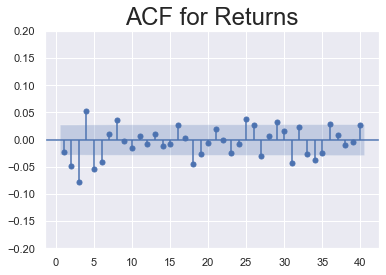

In [73]:
sgt.plot_acf(df.returns,zero = False,lags = 40)
plt.title('ACF for Returns',size=24)
plt.ylim(-0.2,0.2)
plt.show()

c:\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


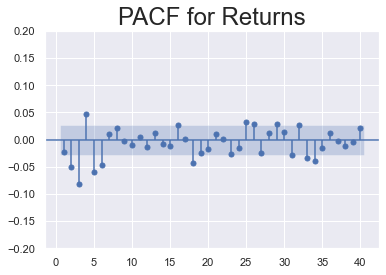

In [74]:
sgt.plot_pacf(df.returns,zero = False,lags = 40)
plt.title('PACF for Returns',size=24)
plt.ylim(-0.2,0.2)
plt.show()

We see that most values above LAG = 6 are insignificant, indicating that the return is mostly driven by it;s value few days ago, The negative value shows that the returns are cyclical, ie, negative returns are followed by positive returns and vice versa.

### AR(1) for returns

In [76]:
model_ret_ar_1 = ARIMA(df.returns,order = (1,0,0))
results_ret_ar_1 = model_ret_ar_1.fit()
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -7929.749
Date:                Sat, 20 Nov 2021   AIC                          15865.497
Time:                        18:44:25   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.143      0.253      -0.013       0.051
ar.L1         -0.0230      0.009     -2.697      0.007      -0.040      -0.006
sigma2         1.3790      0.014    100.092      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7872.72
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The p values are quite high, so we should perhaps look at higher lag models to see if the situation improves.

### Higher Lag models for Returns

In [78]:
model_ret_ar_2 = ARIMA(df.returns,order = (2,0,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -7923.456
Date:                Sat, 20 Nov 2021   AIC                          15854.911
Time:                        18:56:10   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.194      0.233      -0.012       0.050
ar.L1         -0.0242      0.009     -2.799      0.005      -0.041      -0.007
ar.L2         -0.0500      0.008     -6.371      0.000      -0.065      -0.035
sigma2         1.3756      0.014     99.592      0.000       1.348       1.403
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              7730.29
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
LLR_test(model_ret_ar_1,model_ret_ar_2)

0.0

The p value for LAG = 2 is zero, so quite significant.P value for LAG 1 has also reduced. LLR test results are also good.

In [82]:
model_ret_ar_3 = ARIMA(df.returns,order = (3,0,0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -7906.738
Date:                Sat, 20 Nov 2021   AIC                          15823.477
Time:                        19:00:21   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.272      0.203      -0.010       0.048
ar.L1         -0.0283      0.009     -3.199      0.001      -0.046      -0.011
ar.L2         -0.0521      0.008     -6.684      0.000      -0.067      -0.037
ar.L3         -0.0815      0.008    -10.192      0.000      -0.097      -0.066
sigma2         1.3664      0.014     94.518      0.000       1.338       1.395
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              6859.16
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
LLR_test(model_ret_ar_2,model_ret_ar_3)

0.0

Even better. AR(3) outperforms AR(2).

In [85]:
model_ret_ar_4 = ARIMA(df.returns,order = (4,0,0))
results_ret_ar_4 = model_ret_ar_4.fit()
results_ret_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -7901.330
Date:                Sat, 20 Nov 2021   AIC                          15814.661
Time:                        19:03:32   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.208      0.227      -0.012       0.049
ar.L1         -0.0245      0.009     -2.770      0.006      -0.042      -0.007
ar.L2         -0.0496      0.008     -6.327      0.000      -0.065      -0.034
ar.L3         -0.0802      0.008     -9.995      0.000      -0.096      -0.064
ar.L4          0.0464      0.008      5.650      0.000       0.030       0.063
sigma2         1.3635      0.015     92.776      0.000       1.335       1.392
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              6580.94
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
LLR_test(model_ret_ar_3,model_ret_ar_4)

0.001

In [87]:
model_ret_ar_5 = ARIMA(df.returns,order = (5,0,0))
results_ret_ar_5 = model_ret_ar_5.fit()
results_ret_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -7892.390
Date:                Sat, 20 Nov 2021   AIC                          15798.779
Time:                        19:04:36   BIC                          15844.428
Sample:                    01-10-1994   HQIC                         15814.775
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.273      0.203      -0.010       0.048
ar.L1         -0.0217      0.009     -2.396      0.017      -0.040      -0.004
ar.L2         -0.0544      0.008     -6.826      0.000      -0.070      -0.039
ar.L3         -0.0831      0.008    -10.406      0.000      -0.099      -0.067
ar.L4          0.0449      0.008      5.431      0.000       0.029       0.061
ar.L5         -0.0596      0.008     -7.468      0.000      -0.075      -0.044
sigma2         1.3586      0.015     92.526      0.000       1.330       1.387
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              6398.87
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
LLR_test(model_ret_ar_4,model_ret_ar_5)

0.0

In [89]:
model_ret_ar_6 = ARIMA(df.returns,order = (6,0,0))
results_ret_ar_6 = model_ret_ar_6.fit()
results_ret_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -7886.945
Date:                Sat, 20 Nov 2021   AIC                          15789.890
Time:                        19:05:24   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.324      0.186      -0.009       0.047
ar.L1         -0.0245      0.009     -2.640      0.008      -0.043      -0.006
ar.L2         -0.0523      0.008     -6.505      0.000      -0.068      -0.037
ar.L3         -0.0870      0.008    -10.853      0.000      -0.103      -0.071
ar.L4          0.0424      0.008      5.133      0.000       0.026       0.059
ar.L5         -0.0607      0.008     -7.568      0.000      -0.076      -0.045
ar.L6         -0.0466      0.009     -5.216      0.000      -0.064      -0.029
sigma2         1.3557      0.015     92.513      0.000       1.327       1.384
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6487.37
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
LLR_test(model_ret_ar_5,model_ret_ar_6)

0.001

In [91]:
model_ret_ar_7 = ARIMA(df.returns,order = (7,0,0))
results_ret_ar_7 = model_ret_ar_7.fit()
results_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(7, 0, 0)   Log Likelihood               -7886.647
Date:                Sat, 20 Nov 2021   AIC                          15791.294
Time:                        19:06:28   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.304      0.192      -0.010       0.047
ar.L1         -0.0240      0.009     -2.579      0.010      -0.042      -0.006
ar.L2         -0.0517      0.008     -6.375      0.000      -0.068      -0.036
ar.L3         -0.0874      0.008    -10.725      0.000      -0.103      -0.071
ar.L4          0.0433      0.008      5.183      0.000       0.027       0.060
ar.L5         -0.0601      0.008     -7.463      0.000      -0.076      -0.044
ar.L6         -0.0463      0.009     -5.173      0.000      -0.064      -0.029
ar.L7          0.0109      0.009      1.205      0.228      -0.007       0.029
sigma2         1.3555      0.015     91.777      0.000       1.327       1.384
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6448.20
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
LLR_test(model_ret_ar_6,model_ret_ar_7)

0.44

p values for LAG 7 is quite high. AIC, BIC have increased. LLR test is also negative - high p value.
So, perhaps safe to conclude that AR(6) is best.

### Normalizing Values

In [93]:
benchmark = df.market_value.iloc[0]
df['norm'] = df.market_value.div(benchmark).mul(100)
sts.adfuller(df.norm)

C:\Users\Admin\AppData\Local\Temp/ipykernel_11684/2298868729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm'] = df.market_value.div(benchmark).mul(100)


(-1.8928710132672304,
 0.3354222074330093,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19553.90073102193)

Normalized Prices are non-stationary. So,not useful. Let's try normalizing returns.

### Normalizing Returns

In [96]:
benchmark_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(benchmark_ret).mul(100)
sts.adfuller(df.norm_ret)

C:\Users\Admin\AppData\Local\Temp/ipykernel_11684/3093353087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_ret'] = df.returns.div(benchmark_ret).mul(100)


(-12.77026571949723,
 7.798058336038551e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80114.49116124898)

Normalized returns are stationary. So, good to use.

### AR on normalized returns

In [98]:
model_norm_ret_ar_1 = ARIMA(df.norm_ret,order = (1,0,0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -40351.743
Date:                Sat, 20 Nov 2021   AIC                          80709.487
Time:                        19:42:36   BIC                          80729.050
Sample:                    01-10-1994   HQIC                         80716.342
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731     10.476     -1.143      0.253     -32.506       8.560
ar.L1         -0.0230      0.009     -2.697      0.007      -0.040      -0.006
sigma2      5.617e+05   5612.960    100.071      0.000    5.51e+05    5.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7872.68
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [99]:
model_norm_ret_ar_2 = ARIMA(df.norm_ret,order = (2,0,0))
results_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
results_norm_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -40345.450
Date:                Sat, 20 Nov 2021   AIC                          80698.901
Time:                        19:44:02   BIC                          80724.986
Sample:                    01-10-1994   HQIC                         80708.041
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731     10.050     -1.191      0.234     -31.671       7.725
ar.L1         -0.0242      0.009     -2.797      0.005      -0.041      -0.007
ar.L2         -0.0500      0.008     -6.368      0.000      -0.065      -0.035
sigma2      5.603e+05   5628.139     99.561      0.000    5.49e+05    5.71e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              7730.40
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### Comparing the normalized and non-normalized returns we find that the only thing that changes is the constant. Nothing else.

### Residuals

We expect residuals to be white noise. Zero mean. Constant Variation. Stationary. No autocorrelation for any lags. Let's see if we find what we expect to find.

In [103]:
df['res_price'] = results_ar_7.resid

C:\Users\Admin\AppData\Local\Temp/ipykernel_11684/794269739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_price'] = results_ar_7.resid


In [104]:
df.res_price.mean()

0.3522785795345277

In [105]:
df.res_price.var()

4010.358058670839

In [106]:
sts.adfuller(df.res_price)

(-75.94771894686276,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 54832.16530984712)

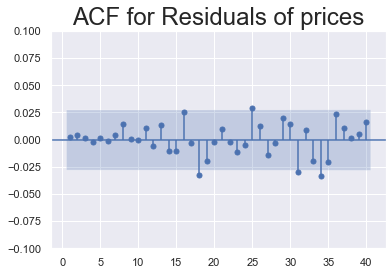

In [109]:
sgt.plot_acf(df.res_price,zero = False,lags = 40)
plt.title('ACF for Residuals of prices',size=24)
plt.ylim(-0.1,0.1)
plt.show()

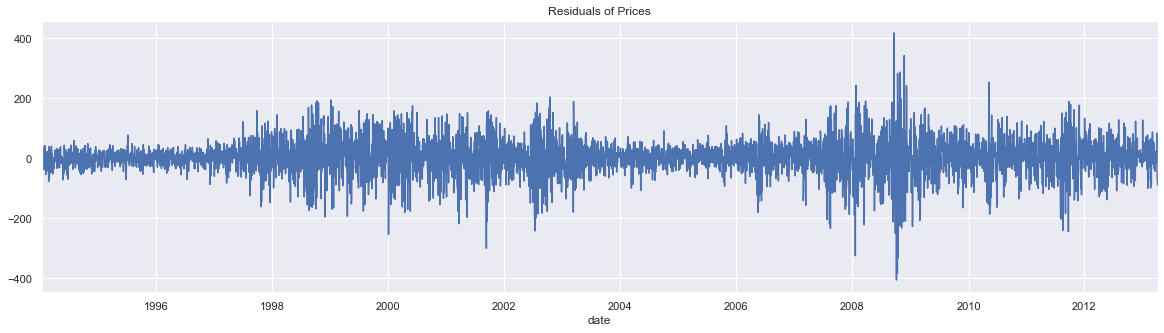

In [110]:
df.res_price[1:].plot(figsize=(20,5))
plt.title('Residuals of Prices')
plt.show()

### Residuals on returns

In [112]:
df['res_ret'] = results_ret_ar_6.resid

C:\Users\Admin\AppData\Local\Temp/ipykernel_11684/2424754327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ret'] = results_ret_ar_6.resid


In [113]:
df.res_ret.mean()

-4.853045496398005e-05

In [114]:
df.res_ret.var()

1.35598021287151

In [115]:
sts.adfuller(df.res_ret)

(-70.78411835680876,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15692.570807333326)

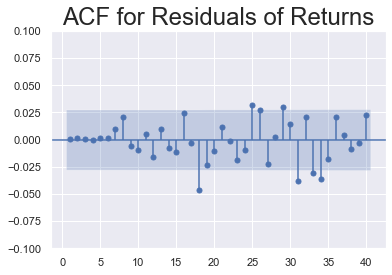

In [116]:
sgt.plot_acf(df.res_ret,zero = False,lags = 40)
plt.title('ACF for Residuals of Returns',size=24)
plt.ylim(-0.1,0.1)
plt.show()

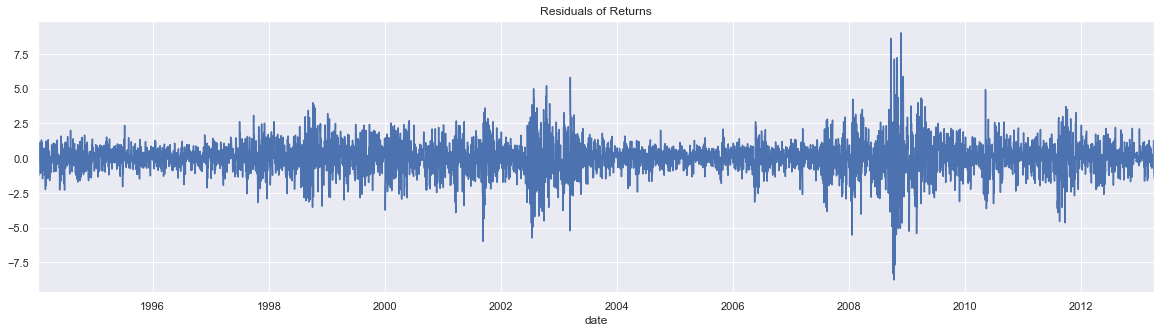

In [118]:
df.res_ret[1:].plot(figsize=(20,5))
plt.title('Residuals of Returns')
plt.show()

Both residuals appear to be similar to white noise. In case of returns, the mean is lower.